In [2]:
import pandas as pd

df = pd.read_csv("clarknet_dataset.csv")
print(df)

                    datetime data_length
0        1995-08-28 00:00:34        3542
1        1995-08-28 00:00:35        4993
2        1995-08-28 00:00:35        5836
3        1995-08-28 00:00:36       18338
4        1995-08-28 00:00:36        5944
...                      ...         ...
1654877  1995-09-03 23:58:59        1093
1654878  1995-09-03 23:58:59       42595
1654879  1995-09-03 23:59:00        4288
1654880  1995-09-03 23:59:00        3957
1654881  1995-09-03 23:59:00        6464

[1654882 rows x 2 columns]


In [3]:
x = df[(df["data_length"] != '-') & (df["datetime"] >= '1995-08-28 00:00:00') & (df["datetime"] < '1995-08-28 00:05:00')].groupby(["datetime"]).count()
x

,data_length
datetime,
1995-08-28 00:00:34,1
1995-08-28 00:00:35,2
1995-08-28 00:00:36,2
1995-08-28 00:00:37,2
1995-08-28 00:00:38,4
...,...
1995-08-28 00:04:54,6
1995-08-28 00:04:56,3
1995-08-28 00:04:57,6


In [17]:
dfx = df[df["data_length"] != '-']
#dfx.to_csv("clarknet_dataset_1.csv", index= False)
dfgr = dfx.groupby(["datetime"]).count().sort_values(by = "data_length")
dfgr

,data_length
datetime,
1995-08-28 00:00:34,1
1995-09-01 20:42:22,1
1995-08-29 15:33:45,1
1995-09-01 20:42:21,1
1995-08-29 15:33:52,1
...,...
1995-08-29 15:36:42,33
1995-08-29 14:36:10,35
1995-08-30 20:17:04,36


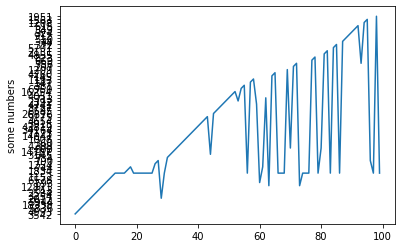

In [9]:
import matplotlib.pyplot as plt
plt.plot(df["data_length"][0:100])
plt.ylabel('some numbers')
plt.show()


In [43]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['order'] = (df['hour'] * 3600 + df['minute']* 60 + df['second'])//300
x = df.groupby(['date','order']).count()

In [46]:
x

datetime  data_length  year  month  day  time  hour  minute  \
date       order                                                                
1995-08-28 0           633          633   633    633  633   633   633     633   
           1           860          860   860    860  860   860   860     860   
           2           773          773   773    773  773   773   773     773   
           3           770          770   770    770  770   770   770     770   
           4           664          664   664    664  664   664   664     664   
...                    ...          ...   ...    ...  ...   ...   ...     ...   
1995-09-03 283         886          886   886    886  886   886   886     886   
           284         698          698   698    698  698   698   698     698   
           285         784          784   784    784  784   784   784     784   
           286         706          706   706    706  706   706   706     706   
           287         696          696   696    696  696   696   696     696   

                  second  
date       order          
1995-08-28 0         633  
           1         860  
           2         773  
           3         770  
           4         664  
...                  ...  
1995-09-03 283       886  
           284       698  
           285       784  
           286       706  
           287       696  

[2016 rows x 9 columns]

ConversionError: Failed to convert value(s) to axis units: array([(datetime.date(1995, 8, 28), 0), (datetime.date(1995, 8, 28), 1),
       (datetime.date(1995, 8, 28), 2), ...,
       (datetime.date(1995, 9, 3), 285), (datetime.date(1995, 9, 3), 286),
       (datetime.date(1995, 9, 3), 287)], dtype=object)

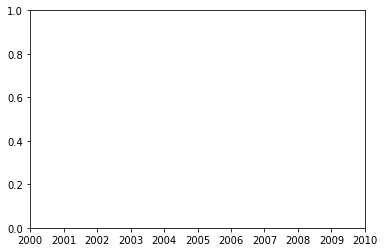

In [45]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.ylabel('some numbers')
plt.show()


In [40]:
df

,datetime,data_length,year,month,day,date,time,hour,minute,second,order
0,1995-08-28 00:00:34,3542,1995,8,28,1995-08-28,00:00:34,0,0,34,0
1,1995-08-28 00:00:35,4993,1995,8,28,1995-08-28,00:00:35,0,0,35,0
2,1995-08-28 00:00:35,5836,1995,8,28,1995-08-28,00:00:35,0,0,35,0
3,1995-08-28 00:00:36,18338,1995,8,28,1995-08-28,00:00:36,0,0,36,0
4,1995-08-28 00:00:36,5944,1995,8,28,1995-08-28,00:00:36,0,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...
1654877,1995-09-03 23:58:59,1093,1995,9,3,1995-09-03,23:58:59,23,58,59,287
1654878,1995-09-03 23:58:59,42595,1995,9,3,1995-09-03,23:58:59,23,58,59,287
1654879,1995-09-03 23:59:00,4288,1995,9,3,1995-09-03,23:59:00,23,59,0,287
1654880,1995-09-03 23:59:00,3957,1995,9,3,1995-09-03,23:59:00,23,59,0,287
